# Import Data

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
nov_28_df = pd.read_json('11-28.json')
nov_29_df = pd.read_json('11-29.json')
nov_30_df = pd.read_json('11-30 redo.json')
nov_30_df_2 = pd.read_json('11-30_2.json')

nov_30_concat = pd.concat([nov_30_df, nov_30_df_2], ignore_index=True)
nov_30_concat = nov_30_concat.drop_duplicates()
nov_30_concat_df = nov_30_concat.sort_values(by=['timestamp'])

dec_1_df = pd.read_json('12-1.json')
dec_2_df = pd.read_json('12-2.json')
dec_3_df = pd.read_json('12-3.json')

dec_4_df = pd.read_json('12-4 redo.json')
dec_4_df_2 = pd.read_json('12-4_2.json')

dec_4_concat = pd.concat([dec_4_df, dec_4_df_2], ignore_index=True)
dec_4_concat = dec_4_concat.drop_duplicates()
dec_4_concat_df = dec_4_concat.sort_values(by=['timestamp'])

dec_5_df = pd.read_json('12-5.json')
dec_6_df = pd.read_json('12-6.json')
dec_7_df = pd.read_json('12-7.json')

dec_8_df = pd.read_json('12-8.json')
dec_8_df_2 = pd.read_json('12-8_2.json')

dec_8_concat = pd.concat([dec_8_df, dec_8_df_2], ignore_index=True)
dec_8_concat = dec_8_concat.drop_duplicates()
dec_8_concat_df = dec_8_concat.sort_values(by=['timestamp'])

dec_9_df = pd.read_json('12-9.json')
dec_9_df_2 = pd.read_json('12-9_2.json')

dec_9_concat = pd.concat([dec_9_df, dec_9_df_2], ignore_index=True)
dec_9_concat = dec_9_concat.drop_duplicates()
dec_9_concat_df = dec_9_concat.sort_values(by=['timestamp'])

dec_10_df = pd.read_json('12-10.json')
dec_11_df = pd.read_json('12-11.json')
dec_12_df = pd.read_json('12-12.json')
dec_13_df = pd.read_json('12-13.json')
dec_14_df = pd.read_json('12-14.json')

In [45]:
mega_df = pd.concat([nov_28_df, nov_29_df, nov_30_concat_df, dec_1_df, dec_2_df, dec_3_df, \
                    dec_4_concat_df, dec_5_df, dec_6_df, dec_7_df, dec_8_concat_df, dec_9_concat_df, \
                    dec_10_df, dec_11_df, dec_12_df, dec_13_df, dec_14_df], ignore_index=True)

In [102]:
mega_df.describe()

,id,likes,replies,retweets,pro_repeal
count,4.193430e+05,419343.000000,419343.000000,419343.000000,419343.000000
mean,9.393097e+17,6.223788,0.206325,4.391949,0.001610
std,1.750021e+15,415.162837,9.443255,304.453924,0.040088
min,9.352972e+17,0.000000,0.000000,0.000000,0.000000
25%,9.381515e+17,0.000000,0.000000,0.000000,0.000000
50%,9.399272e+17,0.000000,0.000000,0.000000,0.000000
75%,9.409810e+17,1.000000,0.000000,0.000000,0.000000
max,9.414578e+17,216270.000000,3694.000000,165604.000000,1.000000


# Data Cleaning

In [53]:
small_slice = mega_df[:1000]

In [50]:
# Function to be used in apply - returns properly formatted hashtags other than #netneutrality

import re, string

def get_hashtags(text):
    hashtags = []
    for t in text.lower().split():
        if (t.startswith("#")) & (t != '#netneutrality'):
            result = re.findall('#[\w_]+', t)
            for x in result:
                hashtags.append(x)
    return hashtags

In [51]:
# Function to be used in apply - returns links

def get_links(text):
    links = []
    for t in text.lower().split():
        if t.startswith("http"):
            links.append(t)
    return links

In [52]:
# Function to be used in apply - returns mentions of other users

def get_mentions(text):
    mentions = []
    for t in text.lower().split():
        if t.startswith("@"):
            if t.endswith("'s"):
                t = t[:-2]
            mentions.append(t)
    return mentions

In [ ]:
mega_df["other_hashtags"] = mega_df["text"].apply(get_hashtags)
mega_df["links"] = mega_df["text"].apply(get_links)
mega_df["@s"] = mega_df["text"].apply(get_mentions)

## Identifying guided information campaigns

In [483]:
# Create Counter that will tally up the number of times text appears in tweets

from collections import Counter
tweet_text_dict = Counter()

for item in mega_df['text']:
        tweet_text_dict[item] += 1

In [493]:
len(tweet_text_dict)

186764

In [484]:
# Create set of those repeated tweets that showed up 100 or more times in the data. These are the ones I am 
# classifying as large information campaigns.

lg_campaign_tweet_set = set()

for k, v in tweet_text_dict.items():
    if v > 99:
        lg_campaign_tweet_set.add(k)

In [487]:
len(lg_campaign_tweet_set)

75

In [496]:
# Create set of those repeated tweets that showed up 1 time in the data. These are the ones I am 
# classifying as original tweets. It is possible that some of the ones that show up between 2-99 times are original
# tweets that have been retweeted, but I would prefer to miss some original tweets than classify some campaigns as
# original.

orig_tweet_set_small = set()

for k, v in tweet_text_dict.items():
    if v < 2:
        orig_tweet_set_small.add(k)

In [497]:
len(orig_tweet_set_small)

179970

In [473]:
# Time to go through and manually remove things that should not be in the large set.

lg_campaign_tweet_set

{'#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking #BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF #EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA',
 '#BreakTheInternet to #StopTheFCC and save #NetNeutrality. Sign up here to join: http://BreakTheInternetProtest.org\xa0',
 '#NetNeutrality',
 '#NetNeutrality dies in 2 days unless we stop this.\n\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766',
 '#NetNeutrality dies in 2 days unless we stop this.\n\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0',
 '#NetNeutrality dies in 2

In [474]:
# Fortunately I only found one, and it appears to be one person tweeting the same thing 113 times.

lg_campaign_tweet_set.remove('#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking #BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF #EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA')

In [480]:
mega_df[mega_df['text'] == '#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking \
#BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF \
#EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA']

,fullname,id,likes,replies,retweets,text,timestamp,url,user,other_hashtags,links,@s,pro_repeal,info_campaign
43,Frank Canete,935298001668415488,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:03:15,/HawaiianKiko12/status/935298001668415488,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
55,Frank Canete,935298288953131008,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:04:23,/HawaiianKiko12/status/935298288953131009,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
65,Frank Canete,935298445702602752,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:05:01,/HawaiianKiko12/status/935298445702602753,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
90,Frank Canete,935298910230265856,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:06:51,/HawaiianKiko12/status/935298910230265856,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
106,Frank Canete,935299175180222464,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:07:55,/HawaiianKiko12/status/935299175180222464,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
126,Frank Canete,935299446278995968,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:08:59,/HawaiianKiko12/status/935299446278995968,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
140,Frank Canete,935299600180699136,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:09:36,/HawaiianKiko12/status/935299600180699136,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
156,Frank Canete,935299783576580096,1,0,0,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:10:20,/HawaiianKiko12/status/935299783576580096,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
3432,Frank Canete,935380718787616768,1,0,2,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 05:31:56,/HawaiianKiko12/status/935380718787616768,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1
3434,Frank Canete,935380840309125120,0,0,0,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 05:32:25,/HawaiianKiko12/status/935380840309125120,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[],0,1


In [481]:
def info_campaign(text):
    if text in lg_campaign_tweet_set:
        return 1
    else:
        return 0

In [498]:
def original_tweet(text):
    if text in orig_tweet_set_small:
        return 1
    else:
        return 0

In [499]:
# Create new columns using above functions

mega_df['info_campaign'] = mega_df['text'].apply(info_campaign)
mega_df['original_tweet'] = mega_df['text'].apply(original_tweet)

## Get to work seeing if there are any tweets in here that appear to be pro-repeal of net neutrality

In [ ]:
# Function to be used in apply - labels tweets that appear to be pro-repeal of net neutrality

def negative_tweet_grab(other_hashtags):
    hashtag_list = ['#notonetneutrality', '#nonetneutrality', '#maga', '#trumptrain', '#libtard', '#presidenttrump',\
                   '#presidentdonaldtrump', '#makeamericagreatagain', '#draintheswamp', '#deplorables', '#soros', '#tcot',\
                   '#tgdn', '#gabfam', '#sjw', '#RestoreInternetFreedom', '#RestoringInternetFreedomOrder', '#IdiotDems',\
                   '#obama']
# Possibly return to this later to add some users to the pro-repeal classification
#     links = ['https://www.youtube.com/watch?v=mIYvQjaT8po', 'https://www.rushlimbaugh.com', 'http://www.infowars.com']
    if len(other_hashtags) > 0:
        for hashtag in other_hashtags:
            if hashtag in hashtag_list:
                return 1
        else:
            return 0
    else:
        return 0

In [ ]:
mega_df['pro_repeal'] = mega_df_cleaning['other_hashtags'].apply(negative_tweet_grab)

In [ ]:
# Create array of usernames that were classified as 'pro-repeal'

pro_repeal_users = mega_df['user'][mega_df['pro_repeal'] == 1]
pro_repeal_users_unique = mega_df['user'][mega_df['pro_repeal'] == 1].unique()

In [ ]:
# Narrow down to unique users who tweeted more than once over this period. These are the users I will be looking at \
# with the Twitter API later.

repeal_df = mega_df[mega_df['pro_repeal'] == 1]
mask = repeal_df["user"].value_counts().values > 1
multi_post_repeal_users = repeal_df["user"].value_counts()[mask].index
multi_post_repeal_user_df = pro_mega_df[pro_mega_df["user"].isin(multi_post_users)]

## Ok, now let's split the data into 3 categories:
### * Guided information campaign tweets
### * Original tweets (only showed up one time)
### * Tweets that appear to be pro-repeal of net neutrality that still used #netneutrality 

In [524]:
campaign_tweets_df = mega_df[(mega_df['info_campaign'] == 1)]
original_tweets_df = mega_df[(mega_df['original_tweet'] == 1) & (mega_df['pro_repeal'] == 0)]

# All of the tweets in this category are determined to be original - there were not any that were classified as \
# pro-repeal and part of an information campaign. The total number of pro-repeal tweets is low.
repeal_tweets_df = mega_df[(mega_df['pro_repeal'] == 1) & (mega_df['original_tweet'] == 1)]

In [531]:
original_total = mega_df['fullname'].count()
new_total = (campaign_tweets_df['fullname'].count()) + (original_tweets_df['fullname'].count()) + \
(repeal_tweets_df['fullname'].count())

# This removed a total of 7.72% of my data since I was not confident in how to classify it as an information campaign
# or original tweet.
print(((original_total-new_total) / original_total) *100)

7.72851818201


## Some EDA

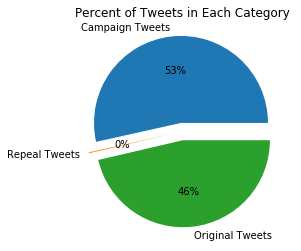

In [582]:
# For my final dataset, what was the breakdown between these three categories?
total_tweets = campaign_tweets_df['fullname'].count() + repeal_tweets_df['fullname'].count() + original_tweets_df['fullname'].count()
percentages = [str(campaign_tweets_df['fullname'].count()/total_tweets), str(repeal_tweets_df['fullname'].count()/total_tweets), \
         str(original_tweets_df['fullname'].count()/total_tweets)]

plt.axes(aspect='equal')
plt.pie([campaign_tweets_df['fullname'].count(), repeal_tweets_df['fullname'].count(), \
         original_tweets_df['fullname'].count()], explode=[.1, .1 , .1], \
        labels=['Campaign Tweets', 'Repeal Tweets', 'Original Tweets'], autopct='%1.0f%%')
plt.title('Percent of Tweets in Each Category')
plt.show()

In [200]:
mega_df['retweets'].describe()

count    419343.000000
mean          4.391949
std         304.453924
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      165604.000000
Name: retweets, dtype: float64

In [245]:
# Count of retweets with outliers removed

retweets_outliers_rmv = mega_df['retweets'][np.abs(mega_df['retweets']-mega_df['retweets'].mean())<=(3*mega_df['retweets'].std())]

In [316]:
retweets_outliers_rmv.describe()

count    419079.000000
mean          1.725305
std          20.391295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         914.000000
Name: retweets, dtype: float64

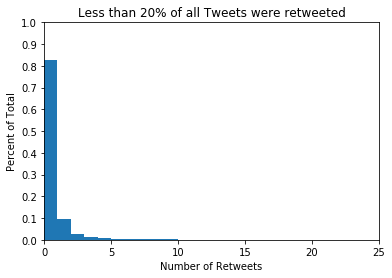

In [368]:
ticks = np.linspace(0,1, 11)

plt.hist(retweets_outliers_rmv, bins = retweets_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Retweets')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 20% of all Tweets were retweeted')
plt.xlim(0,25)
plt.show()

In [532]:
mega_df['likes'].describe()

count    419343.000000
mean          6.223788
std         415.162837
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      216270.000000
Name: likes, dtype: float64

In [320]:
likes_outliers_rmv = mega_df['likes'][np.abs(mega_df['likes']-mega_df['likes'].mean())<=(3*mega_df['likes'].std())]

In [313]:
likes_outliers_rmv.describe()

count    419094.000000
mean          2.508005
std          27.597839
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1246.000000
Name: likes, dtype: float64

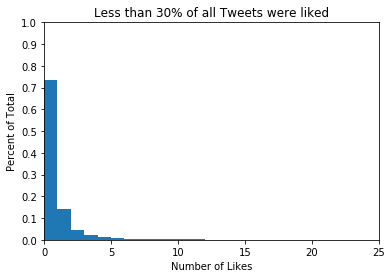

In [367]:
ticks = np.linspace(0,1, 11)

plt.hist(likes_outliers_rmv, bins = likes_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Likes')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 30% of all Tweets were liked')
plt.xlim(0,25)
plt.show()

In [317]:
mega_df['replies'].describe()

count    419343.000000
mean          0.206325
std           9.443255
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3694.000000
Name: replies, dtype: float64

In [322]:
replies_outliers_rmv = mega_df['replies'][np.abs(mega_df['replies']-mega_df['replies'].mean())<=\
                                          (3*mega_df['replies'].std())]

In [323]:
replies_outliers_rmv.describe()

count    419030.000000
mean          0.103826
std           0.789727
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: replies, dtype: float64

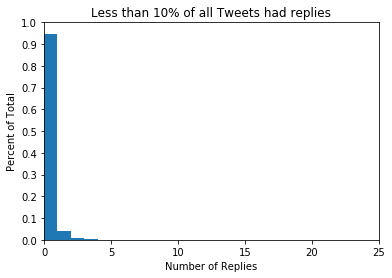

In [364]:
ticks = np.linspace(0,1, 11)

plt.hist(replies_outliers_rmv, bins = replies_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Replies')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 10% of all Tweets had replies')
plt.xlim(0,25)
plt.show()

## Time to compare the different categories

In [ ]:
bins = numpy.linspace(0, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [109]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np
import re

stop_words = set(stopwords.words('english'))
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

def clean_text(dataframe):
    for row, text in enumerate(dataframe['text']):
        filtered_sentence = []
        tokens = tknzr.tokenize(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()).lower())
        for w in tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        small_slice['cleaned_text'][row] = filtered_sentence

In [296]:
from collections import Counter
hashtags = Counter()

for items in mega_df_cleaning['other_hashtags']:
    if len(items) != 0:
        for item in items:
            hashtags[item] += 1

In [411]:
test_tweet_df = mega_df.iloc[257010:257020]

In [415]:
test_tweet_df_2 = mega_df.iloc[3:6]

In [419]:
test_tweet_df_concat = pd.concat([test_tweet_df, test_tweet_df_2])

In [420]:
test_tweet_df_concat

,fullname,id,likes,replies,retweets,text,timestamp,url,user,other_hashtags,links,@s,pro_repeal
257010,Leo M,940652159586263040,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:45,/iliketopoopo/status/940652159586263040,iliketopoopo,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257011,⚢,940652159598845952,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:45,/violetdobrik/status/940652159598845952,violetdobrik,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257012,HUSTLER,940652159833726976,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:46,/HUSTLERadult/status/940652159833726978,HUSTLERadult,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257013,Tamara Winslow,940652160047599616,0,0,0,#BreakTheInternet #NetNeutrality Watch “Battl...,2017-12-12 18:38:46,/tlwinslow/status/940652160047599616,tlwinslow,"[#breaktheinternet, #vimeohttps]",[],[],0
257014,johnbrazel,940652160441778176,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:46,/johnbrazel/status/940652160441778179,johnbrazel,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257015,Maria Laik,940652160605413376,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:46,/maria_laik/status/940652160605413376,maria_laik,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257016,Christopher Natas,940652160626364416,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:46,/ChrisNatas/status/940652160626364416,ChrisNatas,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257017,Bryton Massie,940652160638955520,0,0,0,"Without #netneutrality, indie artists and musi...",2017-12-12 18:38:46,/BrytonMassie/status/940652160638955520,BrytonMassie,[#netneutrality],[http://www.rollingstone.com/music/news/net-ne...,[],0
257018,Henry Inman,940652160655781888,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:46,/Slayer_Nano/status/940652160655781889,Slayer_Nano,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0
257019,ClubFaction,940652160781639680,0,0,0,This is an Internet emergency. Less than 48 ho...,2017-12-12 18:38:46,/ClubFaction/status/940652160781639680,ClubFaction,"[#netneutrality, #breaktheinternet, #stopthefcc]",[http://breaktheinternetprotest.org],[@idltweets],0


In [424]:
from collections import Counter
tweet_dict = Counter()

for item in mega_df_cleaning['text']:
        tweet_dict[item] += 1

In [439]:
lg_campaign_tweet_set = set()

for k, v in tweet_dict.items():
    if v > 99:
        lg_campaign_tweet_set.add(k)

In [442]:
lg_campaign_tweet_set

{'#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking #BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF #EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA',
 '#BreakTheInternet to #StopTheFCC and save #NetNeutrality. Sign up here to join: http://BreakTheInternetProtest.org\xa0',
 '#NetNeutrality',
 '#NetNeutrality dies in 2 days unless we stop this.\n\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766',
 '#NetNeutrality dies in 2 days unless we stop this.\n\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0',
 '#NetNeutrality dies in 2

## Start by tokenizing

## Lower case conversion

## Punctuation removal

## Stop word removal

## Lemmatizing

In [ ]:
from collections import Counter
from urllib.parse import urlparse

In [ ]:
entities = []
for txt in mega_df['text']:
    for t in txt.split():
        if t.startswith("http"): #or t.startswith("@") or t.startswith("#") or t.startswith("RT @"):
#             if not t.startswith("http"):
#                 t = t.lower()
            entities.append(t.strip(" :,"))


In [ ]:
entities_combined = []
for txt in mega_df['text']:
    for t in txt.split():
        if t.startswith("http"): #or t.startswith("@") or t.startswith("#") or t.startswith("RT @"):
#             if not t.startswith("http"):
#                 t = t.lower()
#            entities.append(t.strip(" :,"))
            o = urlparse(t)
            url = (o.scheme + '://' + o.netloc).lower()
            entities_combined.append(url)

In [ ]:
entities_counter = Counter(entities)
for entity, freq in entities_counter.most_common()[:1000]:
    print(entity, freq)

In [ ]:
entities_comb_counter = Counter(entities_combined)
for entity, freq in entities_comb_counter.most_common():
    print(entity, freq)

In [ ]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_md')

In [ ]:
small_slice = mega_df[:5]

In [ ]:
for text in small_slice['text']:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

In [201]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@\w+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def compile_tweets(tweet_collection):
    '''
    Main function to parse tweets.
    '''
    # empty list to store parsed tweets
    tweets = []
    # parsing tweets one by one
    for _idx, tweet in tweet_collection.iterrows():
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet['text'])

        # appending parsed tweet to tweets list
        if tweet['retweets'] > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)

    # return parsed tweets
    return tweets

def main(tweet_collection):
    # calling function to get tweets
    tweets = compile_tweets(tweet_collection)

    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # picking neutral tweets from tweets
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'], "\n")

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'], "\n")
        
    # printing first 5 negative tweets
    print("\n\nNeutral tweets:")
    for tweet in neutweets[:10]:
        print(tweet['text'], "\n")

In [205]:
main(small_slice)

Positive tweets percentage: 20.833333333333332 %
Negative tweets percentage: 22.916666666666668 %
Neutral tweets percentage: 56.25 %


Positive tweets:
A higher price to binge-watch your favourite series on Netflix or listen to a playlist on Spotify.

That, and much more, is what a loss of #netneutrality could mean for Canada: http://ow.ly/jx6z30gR0d5 pic.twitter.com/CvI2QcemcG 

#Comcast hints at plan for paid fast lanes after #netneutrality repeal https://buff.ly/2iVWasb  

University tech administrator had to email everyone today to remind them #netneutrality  is vital for our research and use of databases. Great, another thing to worry about is how I'm going to complete research papers without access to the fucken primary sources. 

If only 10% of your audience can afford the technology, it doesn't matter how amazing your picture quality is. There's no profit producing media in that format.

Remember LaserDisc and Betamax?

That's what paid prioritization after #NetNeutrality is se

In [203]:
small_slice

,fullname,id,text,sentiment,links,emojis,@s,likes,replies,retweets,timestamp,user,url,other_hashtags
0,Jake Suellentrop,935297188426649600,@SenPatRoberts Killing net neutrality is killi...,,[],0,0,0,0,0,2017-11-28 00:00:01,jakesuellentrop,/jakesuellentrop/status/935297188426649600,[]
1,Jim McGrath,935297192302059520,"#NetNeutrality affects the internet, which aff...",,[https://www.battleforthenet.com/],0,0,0,0,0,2017-11-28 00:00:02,FrDougal9000,/FrDougal9000/status/935297192302059520,[]
2,Kevin C. Bell,935297193484754944,> #NetNeutrality is an #IoT & #5G issue too -h...,,[],0,0,0,0,0,2017-11-28 00:00:02,Kevin_C_Bell,/Kevin_C_Bell/status/935297193484754945,"[#iot, #5g]"
3,Matan Karasov,935297194730586112,"So the @FCC won't let me be\nOr let me be me, ...",,[],0,0,0,0,0,2017-11-28 00:00:02,MKarasov,/MKarasov/status/935297194730586112,[]
4,Robert Greenwald,935297198170009600,Call the FCC to fight net neutrality repeal! H...,,[http://bit.ly/2nacw4x],0,0,1,0,0,2017-11-28 00:00:03,robertgreenwald,/robertgreenwald/status/935297198170009600,"[#fcc, #internet]"
5,Tulsi Gabbard,935297198274830336,Repealing #NetNeutrality is just another hando...,,[],0,0,1521,59,819,2017-11-28 00:00:03,TulsiGabbard,/TulsiGabbard/status/935297198274830336,[]
6,Kamala Harris,935297210597691392,Revoking #NetNeutrality would further the digi...,,[],0,0,3739,99,1854,2017-11-28 00:00:06,KamalaHarris,/KamalaHarris/status/935297210597691397,[]
7,Brave New Films,935297212795576320,Call the FCC to fight net neutrality repeal! H...,,[http://bit.ly/2nacw4x],0,0,2,0,3,2017-11-28 00:00:07,bravenewfilms,/bravenewfilms/status/935297212795576320,"[#fcc, #internet]"
8,Tis The Season to be Queen 🎄,935297253710946304,#NetNeutrality pic.twitter.com/YWPXWhbEKW,,[],0,0,7,0,6,2017-11-28 00:00:16,ZekZebZab,/ZekZebZab/status/935297253710946317,[]
9,Metro News Canada,935297254361124864,A higher price to binge-watch your favourite s...,,[http://ow.ly/jx6z30gr0d5],0,0,7,2,9,2017-11-28 00:00:17,MetroNewsCanada,/MetroNewsCanada/status/935297254361124864,[]
